In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_column', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('soccer_player_2020.csv')

In [3]:
dataset = dataset[['short_name', 'age', 'height_cm', 'weight_kg', 'overall', 'value_eur', 'wage_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]
dataset.head()

,short_name,age,height_cm,weight_kg,overall,value_eur,wage_eur,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,32,170,72,94,95500000,565000,87.0,92.0,92.0,96.0,39.0,66.0
1,Cristiano Ronaldo,34,187,83,93,58500000,405000,90.0,93.0,82.0,89.0,35.0,78.0
2,Neymar Jr,27,175,68,92,105500000,290000,91.0,85.0,87.0,95.0,32.0,58.0
3,J. Oblak,26,188,87,91,77500000,125000,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175,74,91,90000000,470000,91.0,83.0,86.0,94.0,35.0,66.0


In [4]:
dataset.describe().round(1)

,age,height_cm,weight_kg,overall,value_eur,wage_eur,pace,shooting,passing,dribbling,defending,physic
count,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,16242.0,16242.0,16242.0,16242.0,16242.0,16242.0
mean,25.3,181.4,75.3,66.2,2484037.6,9456.9,67.7,52.3,57.2,62.5,51.6,64.9
std,4.7,6.8,7.0,6.9,5585481.1,21351.7,11.3,14.0,10.4,10.3,16.4,9.8
min,16.0,156.0,50.0,48.0,0.0,0.0,24.0,15.0,24.0,23.0,15.0,27.0
25%,22.0,177.0,70.0,62.0,325000.0,1000.0,61.0,42.0,50.0,57.0,36.0,59.0
50%,25.0,181.0,75.0,66.0,700000.0,3000.0,69.0,54.0,58.0,64.0,56.0,66.0
75%,29.0,186.0,80.0,71.0,2100000.0,8000.0,75.0,63.0,64.0,69.0,65.0,72.0
max,42.0,205.0,110.0,94.0,105500000.0,565000.0,96.0,93.0,92.0,96.0,90.0,90.0


In [5]:
dataset.isnull().sum()

short_name       0
age              0
height_cm        0
weight_kg        0
overall          0
value_eur        0
wage_eur         0
pace          2036
shooting      2036
passing       2036
dribbling     2036
defending     2036
physic        2036
dtype: int64

In [6]:
dataset = dataset.dropna()

In [7]:
dataset.describe().round(1)

,age,height_cm,weight_kg,overall,value_eur,wage_eur,pace,shooting,passing,dribbling,defending,physic
count,16242.0,16242.0,16242.0,16242.0,16242.0,16242.0,16242.0,16242.0,16242.0,16242.0,16242.0,16242.0
mean,25.2,180.5,74.4,66.4,2578808.0,9806.6,67.7,52.3,57.2,62.5,51.6,64.9
std,4.5,6.5,6.7,6.8,5650533.7,21828.9,11.3,14.0,10.4,10.3,16.4,9.8
min,16.0,156.0,50.0,48.0,0.0,0.0,24.0,15.0,24.0,23.0,15.0,27.0
25%,21.0,176.0,70.0,62.0,350000.0,1000.0,61.0,42.0,50.0,57.0,36.0,59.0
50%,25.0,180.0,74.0,66.0,750000.0,3000.0,69.0,54.0,58.0,64.0,56.0,66.0
75%,28.0,185.0,79.0,71.0,2300000.0,9000.0,75.0,63.0,64.0,69.0,65.0,72.0
max,42.0,203.0,110.0,94.0,105500000.0,565000.0,96.0,93.0,92.0,96.0,90.0,90.0


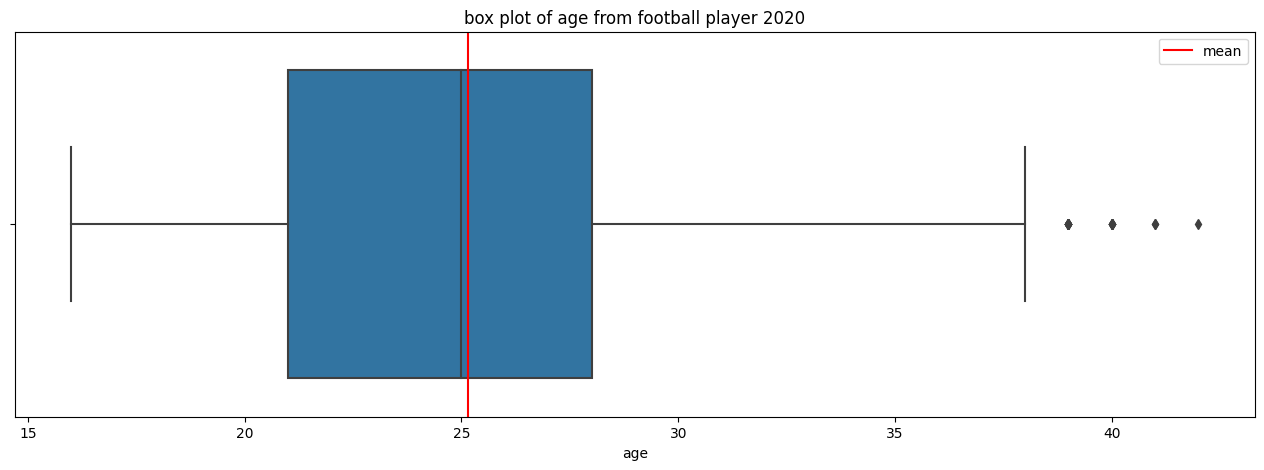

In [8]:
plt.figure(figsize=(16,5))
sns.boxplot(data=dataset, x='age')
plt.axvline(x=np.mean(dataset.age), color='red', label='mean')
plt.title('box plot of age from football player 2020')
plt.legend()
plt.show()

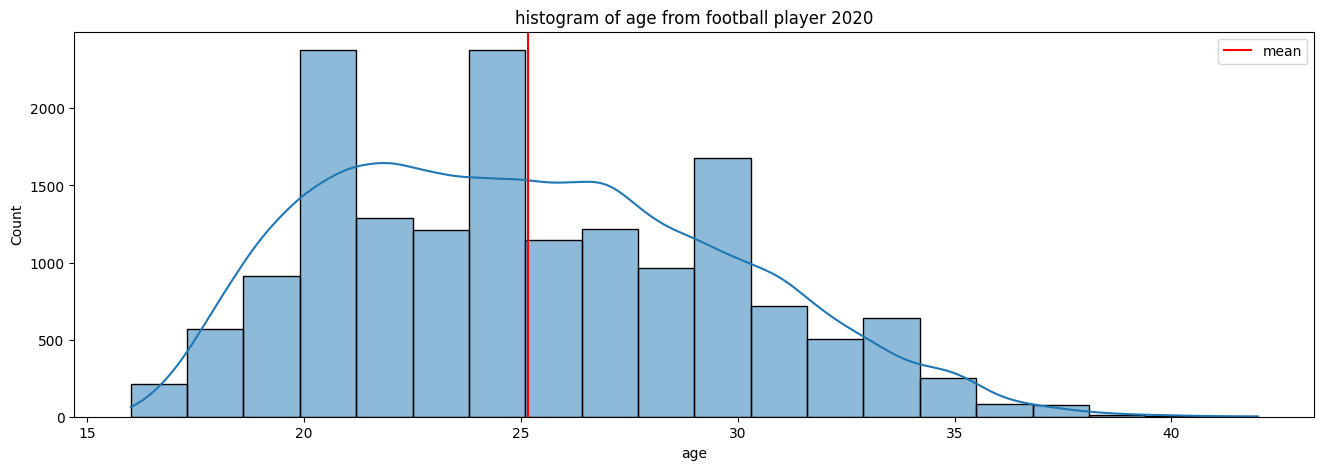

In [9]:
plt.figure(figsize=(16,5))
sns.histplot(data=dataset, x='age', bins=20, kde=True)
plt.axvline(x=np.mean(dataset.age), color='red', label='mean')
plt.title('histogram of age from football player 2020')
plt.legend()
plt.show()

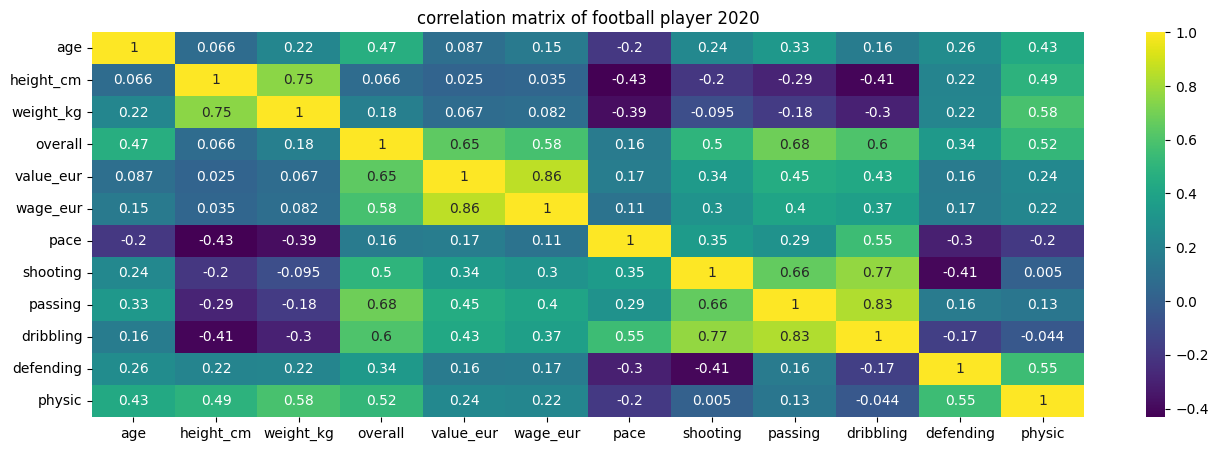

In [10]:
correlation = dataset.drop(['short_name'], axis=1).corr().round(3)

plt.figure(figsize=(16,5))
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title('correlation matrix of football player 2020')
plt.show()

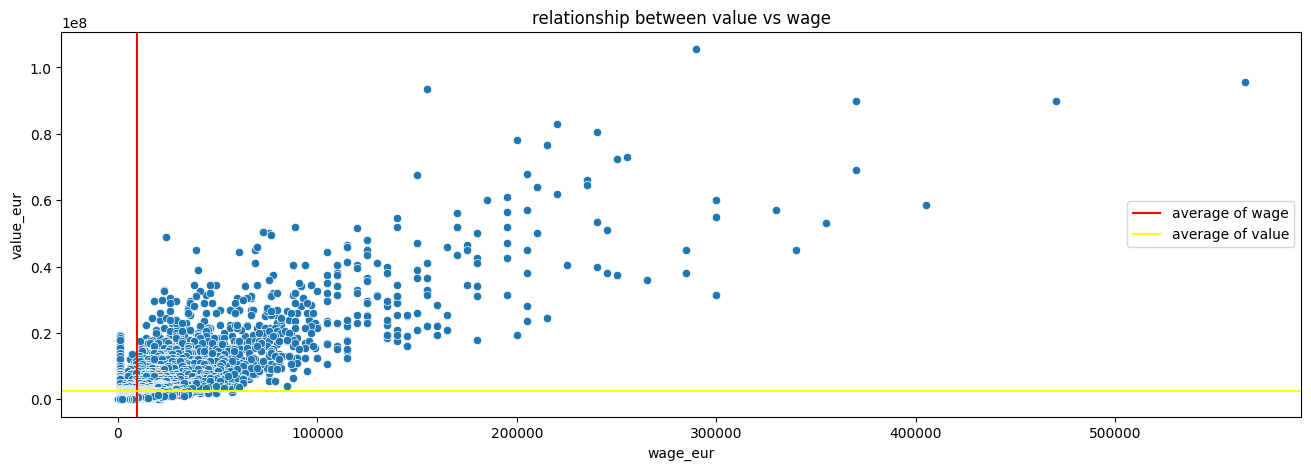

In [11]:
plt.figure(figsize=(16,5))
sns.scatterplot(data=dataset, x='wage_eur', y='value_eur')
plt.axvline(x=np.mean(dataset.wage_eur), color='red', label='average of wage')
plt.axhline(y=np.mean(dataset.value_eur), color='yellow', label='average of value')
plt.title('relationship between value vs wage')
plt.legend()
plt.show()

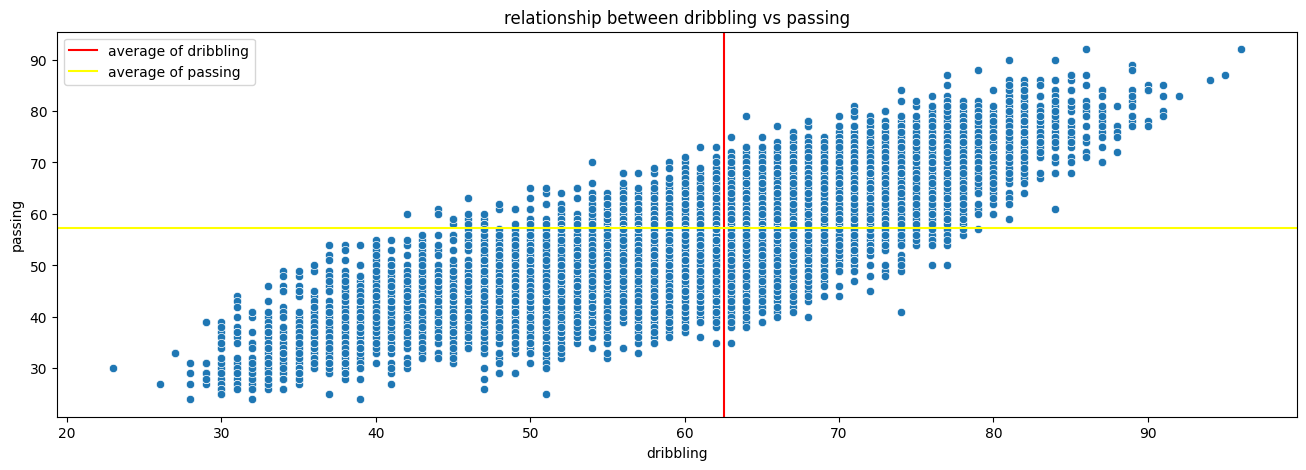

In [12]:
plt.figure(figsize=(16,5))
sns.scatterplot(data=dataset, x='dribbling', y='passing')
plt.axvline(x=np.mean(dataset.dribbling), color='red', label='average of dribbling')
plt.axhline(y=np.mean(dataset.passing), color='yellow', label='average of passing')
plt.title('relationship between dribbling vs passing')
plt.legend()
plt.show()

In [13]:
x = dataset.drop(['short_name', 'overall', 'value_eur', 'wage_eur'], axis=1)
y1 = dataset.overall
y2 = dataset.value_eur
y3 = dataset.wage_eur

In [14]:
import statsmodels.api as sm

In [15]:
xConstant = sm.add_constant(data=x)
model_overall = sm.OLS(y1, xConstant).fit()
model_Value_eur = sm.OLS(y2, xConstant).fit()
model_wage_eur = sm.OLS(y3, xConstant).fit()

In [16]:
print('OLS Regression Result for Overall')
print(model_overall.summary())

OLS Regression Result for Overall
                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     4950.
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:24:38   Log-Likelihood:                -43559.
No. Observations:               16242   AIC:                         8.714e+04
Df Residuals:                   16232   BIC:                         8.721e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.2

In [17]:
print('OLS Regression Result for Value Eur')
print(model_Value_eur.summary())

OLS Regression Result for Value Eur
                            OLS Regression Results                            
Dep. Variable:              value_eur   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     777.0
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:24:38   Log-Likelihood:            -2.7266e+05
No. Observations:               16242   AIC:                         5.453e+05
Df Residuals:                   16232   BIC:                         5.454e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.91

In [18]:
print('OLS Regression Result for Wage Eur')
print(model_wage_eur.summary())

OLS Regression Result for Wage Eur
                            OLS Regression Results                            
Dep. Variable:               wage_eur   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     550.9
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:24:38   Log-Likelihood:            -1.8315e+05
No. Observations:               16242   AIC:                         3.663e+05
Df Residuals:                   16232   BIC:                         3.664e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.455